## Lead Scoring Case Study

## Overall Implementation Approach

1. Data Preperation
    - Data Load 
    - Basic Data Analysis
    - Handling Missing Values (if Any)
    - Data Cleansing


2. EDA
    - Outlier Analysis 
    - Attributes Correlation analysis (via Heat maps)
    - Bi Variant and Uni-Varient Analysis
    - Numerical & Categorical Varibale Analysis & Distribution   
    - Deriving Dummy features for model 


3. Model Building, Evaluation & Recommendations
    - Split data in test & split 
    - Scaling attributes/data
    - Model Evaluation 
    - Selecting best model (post tuning using concept of VIF, P-Value etc.)
    - Model Accuracy Evaluation i.e. Confusion Metric, precision, recal, Specitivity, Sensitivity etc.
    - ROC curve analysis 
    - Prediction on Test Data
    - Model performance Evaluation 
    - Conclusion & Business Recommendations 
  

### Step 1 - Data Preperation 

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

#### 1.1 Data Load

In [3]:
# Loading & reading Lead's datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### 1.2 Basic Data Analysis

In [4]:
# Chek Shape of Data Set
leads_data.shape

(9240, 37)

In [5]:
# Analyzing numerical attributes
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Analyzing Type & # of values for each field
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### 1.3 Handling Missing Values

In [7]:
# Cheking # of number of missing values for each coloumn
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Calculating missing values in terms of percentage
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
##for some categorical columns, category is mentioned as select. we will replace select category with NaN
select_values_columns = ['Specialization','How did you hear about X Education', 'Lead Profile', 'City']
leads_data[select_values_columns] = leads_data[select_values_columns].apply(lambda x: x.replace('Select', np.NaN))
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Calculating missing values in terms of percentage
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
###drop the columns having missing value percentage>36
columns_to_drop = ['Specialization','How did you hear about X Education',
                  'Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index',
                   'Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score']
leads_data.drop(columns_to_drop, axis=1, inplace=True)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [12]:
# again Calculating missing values in terms of percentage
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Now we will handle missing values for following three columns
- Country                                         
- What is your current occupation                 
- What matters most to you in choosing a course

In [13]:
### check value counts of the column
leads_data.Country.value_counts(normalize=2)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Germany                 0.000590
South Africa            0.000590
Kuwait                  0.000590
Canada                  0.000590
Nigeria                 0.000590
Sweden                  0.000443
Belgium                 0.000295
Uganda                  0.000295
Bangladesh              0.000295
China                   0.000295
Philippines             0.000295
Italy                   0.000295
Ghana                   0.000295
Netherlands             0.000295
Asia/Pacific Region     0.000295
Switzerland             0.000148
Liberia                 0.000148
Sri Lanka 

Since Majority Values (~95%) have country as India, this becomes a imbalanced column and will not be contributing to overall analysis & Model much thereofore we'll be dropping it 

In [14]:
## drop country column
leads_data.drop('Country', axis=1, inplace=True)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [15]:
leads_data['What is your current occupation'].value_counts(normalize=2)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

What is your current occupation column has 29% missing values. We will impute these with a category named as 'Other'
Reason for this step is simple which is this attribute seems to be very crucial and gives a very useful customer segmentation

In [16]:
##impute missing values with 'other' category
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].fillna('Other')

In [17]:
###again check the value counts
leads_data['What is your current occupation'].value_counts(normalize=2)

Unemployed              0.606061
Other                   0.292857
Working Professional    0.076407
Student                 0.022727
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

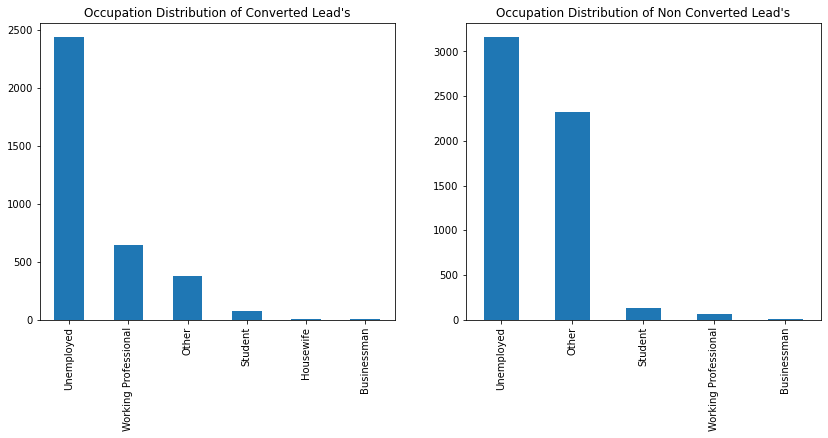

In [18]:
#Plotting distribution of Occupation of lead's
plt.figure(figsize=(14,12)) 
plt.subplot(2,2,1)
leads_data[leads_data['Converted']==1]['What is your current occupation'].value_counts().plot.bar().set_title("Occupation Distribution of Converted Lead's")
plt.subplot(2,2,2)
leads_data[leads_data['Converted']==0]['What is your current occupation'].value_counts().plot.bar().set_title("Occupation Distribution of Non Converted Lead's")
plt.show()

Inferences -
- In the given data set Category 'Unemployed' has the highest count followed by 'Working Professional' for column occupation's in Conveeted Lead's. A simple reason could be that unemployed people wants to upskill themselves hence search/opt for such courses more often

- In the given data set Category 'Unemployed' has the highest count followed by 'Student' for column occupation's in Non -Converted Lead's

In [19]:
###check value counts of column
leads_data['What matters most to you in choosing a course'].value_counts(normalize=2)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

Insight Drawn - 
- There are 29% missing values in 'What matters most to you in choosing a course' column.
- 99% values belongs to 'Better Career Prospects' category. So we will drop this column

In [20]:
# Dropping the column 'What matters most to you in choosing a course' from analysis
leads_data.drop('What matters most to you in choosing a course', axis=1, inplace=True)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [21]:
# again Calculating missing values in terms of percentage
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

Now we willl remove the rows having missing values as percentage is less than 1.5%

In [22]:
#Remove the columns with the null values and again the percentage of mising values
leads_data = leads_data[~leads_data.TotalVisits.isnull()]
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.32
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [23]:
#Remove the columns with the null values and again the percentage of mising values
leads_data = leads_data[~leads_data['Lead Source'].isnull()]
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [24]:
###observe dataframe
leads_data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [25]:
#Dropping unique identifiers e.g Prospect ID & Lead Number as it a id given to lead and has no contribution with target varibale
leads_data.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


#### 1.4 Data Cleansing

In [26]:
#Analysis of lead sources
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
youtubechannel          1
testone                 1
Name: Lead Source, dtype: int64

In [27]:
##It can be observed that few values are not categorized propely e.g. 2 categories for Google exists e.g. google & Google etc.
##These needs to be categorized appropriately and values with lower counts sahll fall in a single category.
##This improves the readability as well the column interpretation
leads_data['Lead Source'].replace(to_replace='google',value='Google',inplace=True)
leads_data['Lead Source'].replace(to_replace=['Facebook','bing','Click2call','Social Media','Live Chat','Press_Release',
                                              'testone','Pay per Click Ads','welearnblog_Home','youtubechannel','blog',
                                              'NC_EDM','WeLearn'],value='Others',inplace=True)

In [28]:
###check the value counts 
leads_data['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64

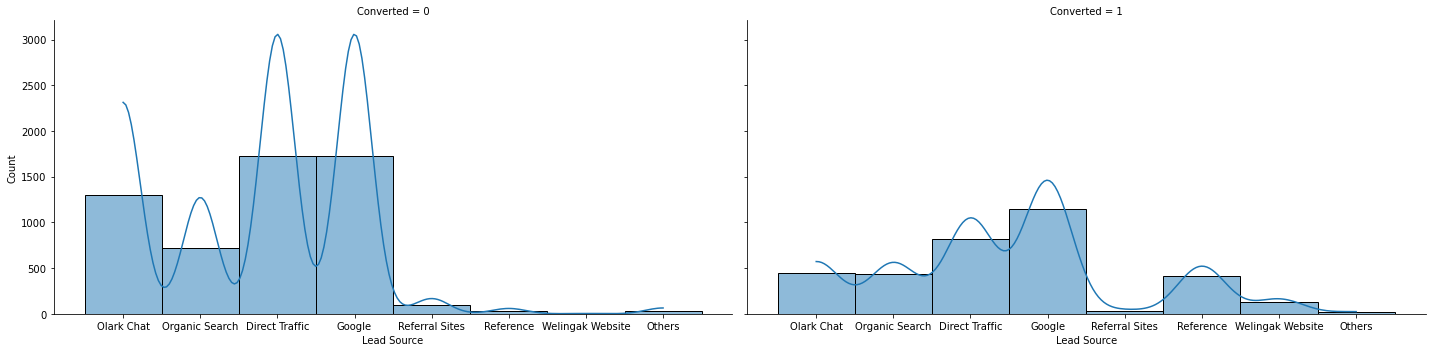

In [29]:
#Distribution analysis of lead sources
sns.displot(data=leads_data, x="Lead Source", col="Converted", kde=True,aspect=2)
plt.show()

#### Inferences:
- Main source to leds get converted is Google

In [30]:
#Distribution analysis of target values
leads_data['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

### Step 2 -  EDA 

#### 2.1 Imblance percentage

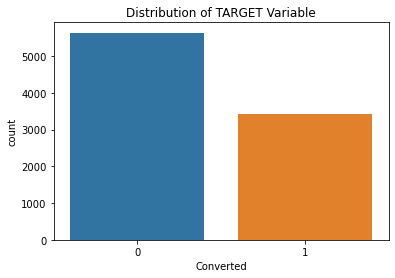

In [31]:
###plot bargraph to check imblance percentage
sns.countplot(leads_data['Converted'])
plt.title("Distribution of TARGET Variable")
plt.show()

In [32]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


#### 2.2 Outliers check

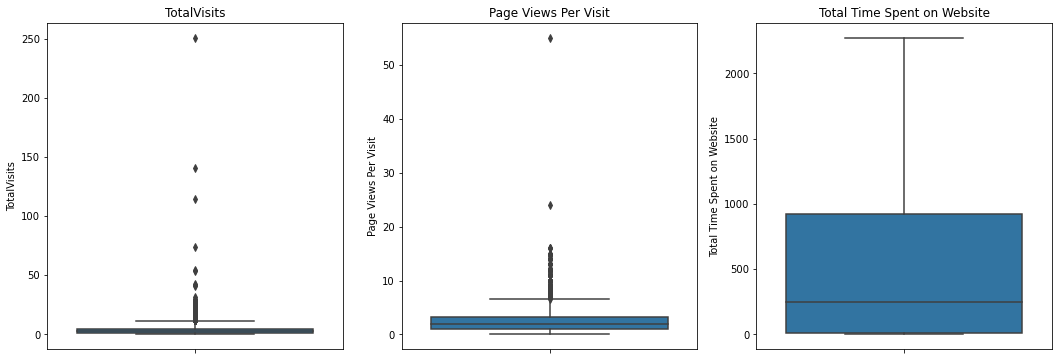

In [33]:
###plot boxplot pf numeric variables to check outliers
plt.figure(figsize = (18,6))

plt.subplot(1,3,1)
sns.boxplot( y=leads_data['TotalVisits'])
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot( y=leads_data['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.subplot(1,3,3)
sns.boxplot( y=leads_data['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')
plt.show()

#### Inferences:
- Outliers are not present in the Total_time_spent_on_website column. 
- Outliers are present in Total_visits and page_views_per_visit column.
- We will cap these outliers

In [34]:
##list down numerical columns
# Check the statistical informations of the numerical variables
numerical_col = leads_data[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]
numerical_col.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,9074.000000,9074.000000,9074.000000
mean,482.887481,2.370151,3.456028
std,545.256560,2.160871,4.858802
min,0.000000,0.000000,0.000000
25%,11.000000,1.000000,1.000000
50%,246.000000,2.000000,3.000000
75%,922.750000,3.200000,5.000000
90%,1373.000000,5.000000,7.000000
95%,1557.000000,6.000000,10.000000
99%,1839.000000,9.000000,17.000000


In [35]:
# Let's cap the data at 95% percentile for the numerical columns
total_visits = leads_data['TotalVisits'].quantile(0.95)
page_views = leads_data['Page Views Per Visit'].quantile(0.95)

# capping the columns
leads_data['TotalVisits'][leads_data['TotalVisits']>total_visits] = total_visits
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit']>page_views] = page_views

#### 2.3 Univariate Annalysis

#### Univariate analysis for Numerical columns

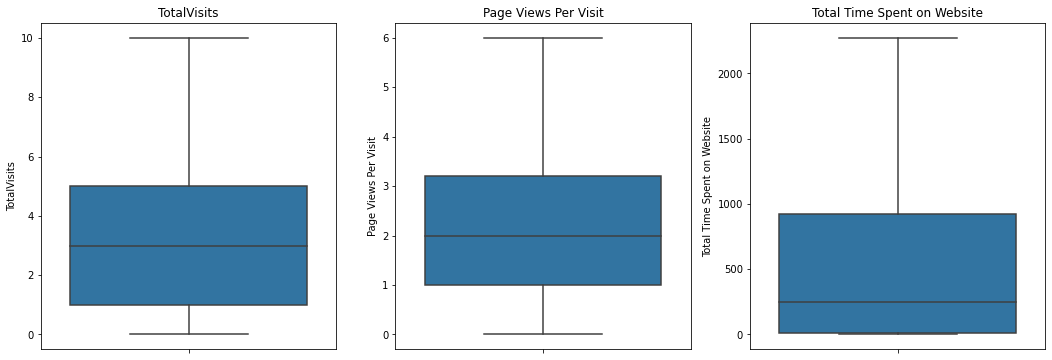

In [36]:
###plot graph for numerical variables
plt.figure(figsize = (18,6))

plt.subplot(1,3,1)
sns.boxplot( y=leads_data['TotalVisits'])
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot( y=leads_data['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.subplot(1,3,3)
sns.boxplot( y=leads_data['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')
plt.show()

#### Inferences:
- Quartile for 'TotalVisits' column is present at 3 views
- In 'Page_views_per_visit' column,median is present at 2 views

#### Univariate analysis for categorical column

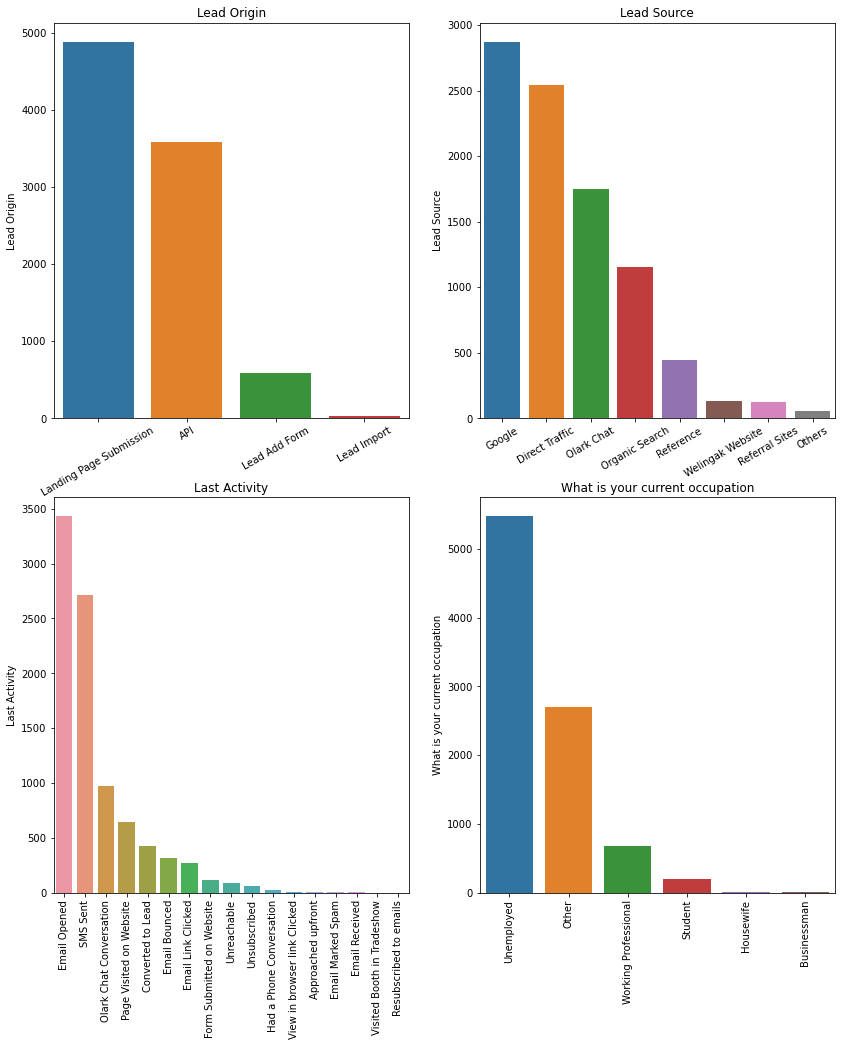

In [37]:
plt.figure(figsize=(14,16)) 
# Making a plot with 2 subplots

Lead_Origin = leads_data['Lead Origin'].value_counts()
Lead_Source = leads_data['Lead Source'].value_counts()
Last_Activity = leads_data['Last Activity'].value_counts()
current_occupation = leads_data['What is your current occupation'].value_counts()

plt.subplot(2,2,1)
sns.barplot(x=Lead_Origin.index, y=Lead_Origin)
plt.title("Lead Origin", fontsize=12)
plt.xticks(rotation=30)

plt.subplot(2,2,2)
sns.barplot(x=Lead_Source.index, y=Lead_Source)
plt.title("Lead Source", fontsize=12)
plt.xticks(rotation=30)

plt.subplot(2,2,3)
sns.barplot(x=Last_Activity.index, y=Last_Activity)
plt.title("Last Activity", fontsize=12)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.barplot(x=current_occupation.index, y=current_occupation)
plt.title("What is your current occupation", fontsize=12)
plt.xticks(rotation=90)

plt.show()

#### Inferences:
- Landing page submission is main origin for leads conversion
- Google, direct traffic and olark are main sources for lead conversion
- Huge people are with the occupation unemployed
- Around 50% of the people's last activity is Email opened
    

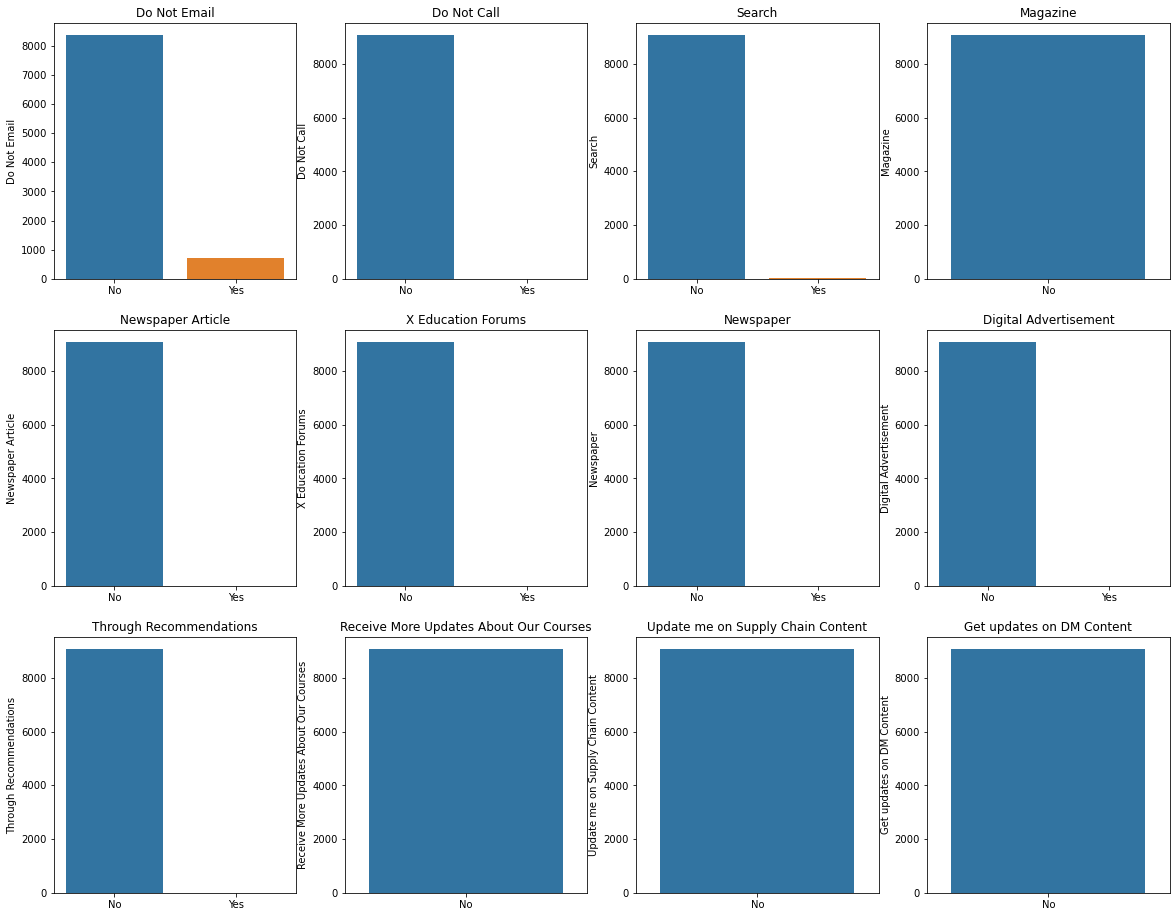

In [38]:
###analyse yes no columns 
yes_no_columns=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
               'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
               'Update me on Supply Chain Content','Get updates on DM Content']

plt.figure(figsize=(20,16)) 
for i in range(0,len(yes_no_columns)):
    col_name=yes_no_columns[i]
    val_count = leads_data[col_name].value_counts()
    plt.subplot(3,4,i+1)
    sns.barplot(x=val_count.index, y=val_count)
    plt.title(col_name, fontsize=12)
    

#### Inferences:
- There are some columns which are highly baised like 'Receive more updated about our courses', 'Update on my supply chain contennt','Get update on my DM content','Magazine'
- All the columns are tends towared 'NO'

According to above graph, almost all the columns are baised towared NO. so we will simple drop these columns

In [39]:
## Dropping Imbalanced Columns 
Drop_Col=['Do Not Call','Search','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
         'Get updates on DM Content','I agree to pay the amount through cheque','Newspaper Article'
         ,'Through Recommendations','Digital Advertisement','Newspaper','X Education Forums']
leads_data.drop(Drop_Col,inplace=True,axis=1)


In [40]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 2.4 Correlation

We will devide the data into two dataframe
- converted=1
- converted=0

In [41]:
###Create two dataframes
leads_data_converted_1=leads_data[leads_data['Converted']==1]
leads_data_converted_1.drop('Converted',inplace=True,axis=1)
leads_data_converted_0=leads_data[leads_data['Converted']==0]
leads_data_converted_0.drop('Converted',inplace=True,axis=1)

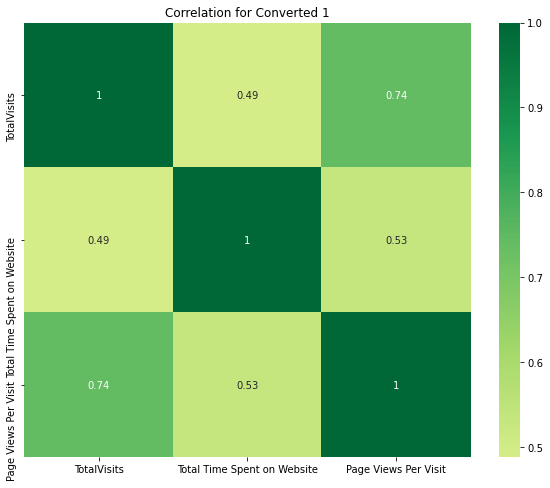

In [42]:
###plot heatmap to find correlation between all numerical variables when target variable is 0
plt.figure(figsize=(10,8)) 
sns.heatmap(leads_data_converted_1.corr(), annot=True ,center=0.35, cmap="RdYlGn")
plt.title('Correlation for Converted 1')
plt.show()

- Strong correlation present between page views per visit to total visit

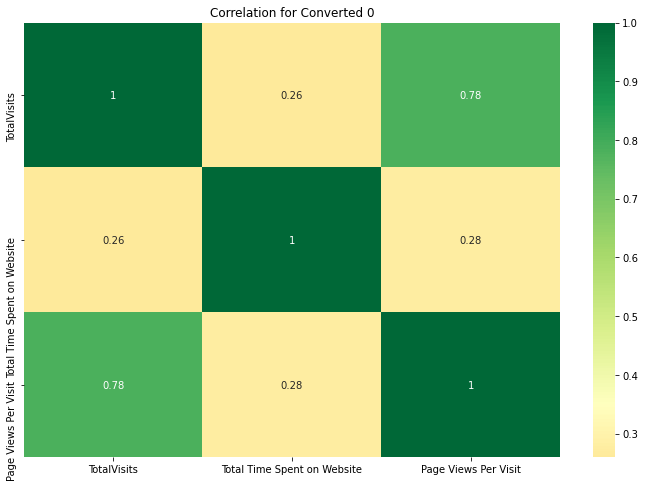

In [43]:
###plot heatmap to find correlation between all numerical variables when target variable is 0
plt.figure(figsize=(12,8)) 
sns.heatmap(leads_data_converted_0.corr(), annot=True ,center=0.35, cmap="RdYlGn")
plt.title('Correlation for Converted 0')
plt.show()

- There is strong correlation present between TotalVisit and Converted 

#### 2.5 Bivariate Analysis

#### Bivariate analysis on numerical variables

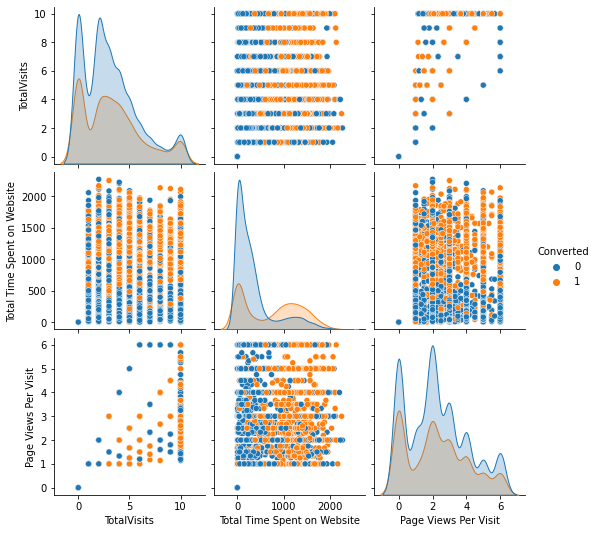

In [44]:
#plot the pair plot of leads data
sns.pairplot(data=leads_data,hue="Converted")
plt.show()

- Linear relationship present between Page views per visit and total visits

#### Bivariate analysis between Numerical- Numerical variables

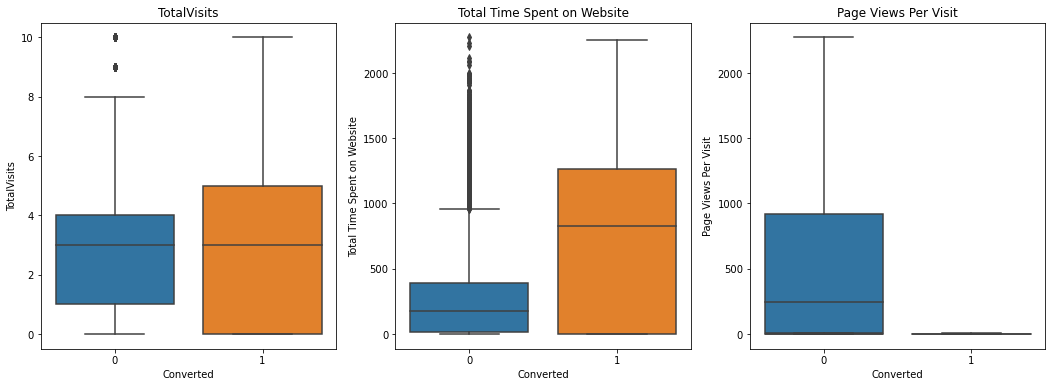

In [45]:
#plot the box plot of for total time spent on website
plt.figure(figsize = (18,6))

plt.subplot(1,3,1)
sns.boxplot(data=leads_data,x='Converted',y='TotalVisits')
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(data=leads_data,x='Converted',y='Total Time Spent on Website')
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
sns.boxplot( y=leads_data['Total Time Spent on Website'])
sns.boxplot(data=leads_data,x='Converted',y='Page Views Per Visit')
plt.title('Page Views Per Visit')

plt.show()

- Quartile for column 'TotalVisits' is same for both leads converted and leads not converted
- Median for column 'Total Time Spend on Website' is more leads converted than leads not converted
- Data is not present for leads converted in Page views per visit column

#### Bivariate analysis for categorical column

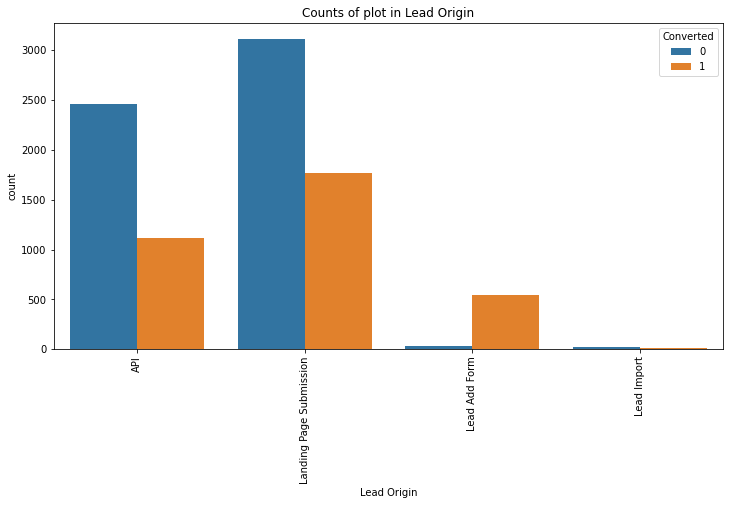

In [46]:
###plot graph for 'Leads origin' and converted column
plt.figure(figsize = (12,6))
sns.countplot(leads_data['Lead Origin'], hue=leads_data.Converted)
plt.title('Counts of plot in Lead Origin')
plt.xticks(rotation=90)
plt.show()

- Count of leads converted is less than leads not converted for every category
- Most of leads are getting converted in landing page submuission category as compared to others
- For 'Land Add Form' count of leads converted is more than not converted

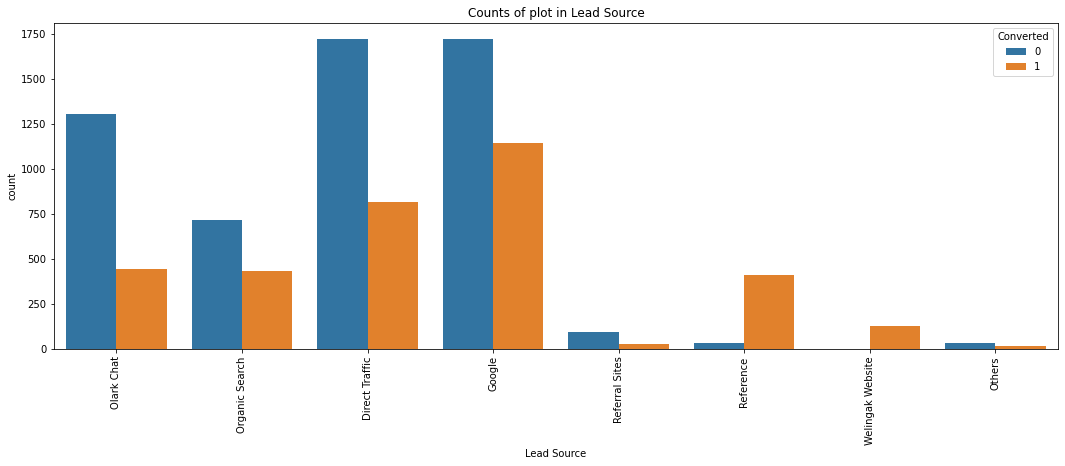

In [47]:
###plot graph for 'Lead Source' and converted column
plt.figure(figsize = (18,6))
sns.countplot(leads_data['Lead Source'], hue=leads_data.Converted)
plt.title('Counts of plot in Lead Source')
plt.xticks(rotation=90)
plt.show()

- For the sources Olark Chat, Organic Search, Direct Traffic, Google count of leads converted is less than leads not converted
- Where as for the sources Reference, Welingak website count of leads converted is more than not converted

### Step 3- Deriving Dummy features

In [48]:
### observe the dataframe
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [49]:
###function to convert yes-no category to numeric form
def email_map(x):
    return x.map({"Yes":1,"No":0})

##convert Do Not Email column to numeric form
leads_data[['Do Not Email']] = leads_data[['Do Not Email']].apply(email_map)

In [50]:
###function to convert yes-no category to numeric form
def mastering_map(x):
    return x.map({"Yes":1,"No":0})

##convert A free copy of Mastering The Interview column to numeric form
leads_data[['A free copy of Mastering The Interview']] = leads_data[['A free copy of Mastering The Interview']].apply(mastering_map)

In [51]:
### again check datframe
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [52]:
###check the value counts
leads_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [53]:
###replace the the categories having less than 100 count as 'Others'
leads_data['Last Activity'].replace(to_replace=['Visited Booth in Tradeshow','Resubscribed to emails','Email Received',
                                                'Email Marked Spam','Approached upfront','View in browser link Clicked'
                                                'Had a Phone Conversation','Unsubscribed',
                                                'Unreachable','View in browser link Clicked'],value='Others',inplace=True)

In [54]:
##again check the value count
leads_data['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        166
Form Submitted on Website     116
Had a Phone Conversation       25
Name: Last Activity, dtype: int64

In [55]:
###check the value counts
leads_data['What is your current occupation'].value_counts()

Unemployed              5476
Other                   2698
Working Professional     677
Student                  206
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [56]:
###create the dummy variable for 'Last Activity'
last_activity_dummy_status = pd.get_dummies(leads_data['Last Activity'], drop_first = True,prefix='Last_Activity')
leads_data = pd.concat([leads_data,last_activity_dummy_status], axis = 1)
leads_data.drop(['Last Activity'], axis = 1, inplace = True)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0,Modified,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0,Email Opened,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,1,Email Opened,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,0,Modified,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,0,Modified,0,0,0,0,0,0,0,0,0


In [57]:
###check the value count of 'Lead Source'
leads_data['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64

In [58]:
###create the dummy variable for 'Lead Source'
source = pd.get_dummies(leads_data['Lead Source'], drop_first = True,prefix='Lead_Source')
leads_data = pd.concat([leads_data,source], axis = 1)
leads_data.drop(['Lead Source'], axis = 1, inplace = True)
leads_data.head()

,Lead Origin,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website
0,API,0,0,0.0,0,0.0,Unemployed,0,Modified,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,API,0,0,5.0,674,2.5,Unemployed,0,Email Opened,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,0,1,2.0,1532,2.0,Student,1,Email Opened,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,0,0,1.0,305,1.0,Unemployed,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,0,1,2.0,1428,1.0,Unemployed,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [59]:
###create the dummy variable for 'What is your current occupation'
occupation = pd.get_dummies(leads_data['What is your current occupation'], drop_first = True,prefix='Occupation')
leads_data = pd.concat([leads_data,occupation], axis = 1)
leads_data.drop(['What is your current occupation'], axis = 1, inplace = True)
leads_data.head()

,Lead Origin,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,API,0,0,0.0,0,0.0,0,Modified,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,0,0,5.0,674,2.5,0,Email Opened,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,0,1,2.0,1532,2.0,1,Email Opened,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,0,0,1.0,305,1.0,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,0,1,2.0,1428,1.0,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [60]:
###create the dummy variable for 'Lead Origin'
origin = pd.get_dummies(leads_data['Lead Origin'], drop_first = True,prefix='Lead_Origin')
leads_data = pd.concat([leads_data,origin], axis = 1)
leads_data.drop(['Lead Origin'], axis = 1, inplace = True)
leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import
0,0,0,0.0,0,0.0,0,Modified,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,Email Opened,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,Email Opened,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1.0,305,1.0,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,1,2.0,1428,1.0,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [61]:
###create the dummy variable for 'Last Notable Activity'
last_activity = pd.get_dummies(leads_data['Last Notable Activity'], drop_first = True,prefix='Last_Noteable_Activity')
leads_data = pd.concat([leads_data,last_activity], axis = 1)
leads_data.drop(['Last Notable Activity'], axis = 1, inplace = True)
leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Last_Noteable_Activity_Email Bounced,Last_Noteable_Activity_Email Link Clicked,Last_Noteable_Activity_Email Marked Spam,Last_Noteable_Activity_Email Opened,Last_Noteable_Activity_Email Received,Last_Noteable_Activity_Form Submitted on Website,Last_Noteable_Activity_Had a Phone Conversation,Last_Noteable_Activity_Modified,Last_Noteable_Activity_Olark Chat Conversation,Last_Noteable_Activity_Page Visited on Website,Last_Noteable_Activity_Resubscribed to emails,Last_Noteable_Activity_SMS Sent,Last_Noteable_Activity_Unreachable,Last_Noteable_Activity_Unsubscribed,Last_Noteable_Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [62]:
###check column names of the dataframe
leads_data.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_Others',
       'Last_Activity_Page Visited on Website', 'Last_Activity_SMS Sent',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Others',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Last_Noteable_Activity_E

#### Final dataframe of the dataset

In [63]:
###check the final dataframe of the dataset
leads_data.shape

(9074, 45)

In [64]:
###observe datatypes of all columns
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 45 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Do Not Email                                         9074 non-null   int64  
 1   Converted                                            9074 non-null   int64  
 2   TotalVisits                                          9074 non-null   float64
 3   Total Time Spent on Website                          9074 non-null   int64  
 4   Page Views Per Visit                                 9074 non-null   float64
 5   A free copy of Mastering The Interview               9074 non-null   int64  
 6   Last_Activity_Email Bounced                          9074 non-null   uint8  
 7   Last_Activity_Email Link Clicked                     9074 non-null   uint8  
 8   Last_Activity_Email Opened                           9074 non-null  

### Step 4 -Model Building, Evaluation & Recommendations

#### 4.1 Split data in test & split

In [65]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Last_Noteable_Activity_Email Bounced,Last_Noteable_Activity_Email Link Clicked,Last_Noteable_Activity_Email Marked Spam,Last_Noteable_Activity_Email Opened,Last_Noteable_Activity_Email Received,Last_Noteable_Activity_Form Submitted on Website,Last_Noteable_Activity_Had a Phone Conversation,Last_Noteable_Activity_Modified,Last_Noteable_Activity_Olark Chat Conversation,Last_Noteable_Activity_Page Visited on Website,Last_Noteable_Activity_Resubscribed to emails,Last_Noteable_Activity_SMS Sent,Last_Noteable_Activity_Unreachable,Last_Noteable_Activity_Unsubscribed,Last_Noteable_Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [66]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
###Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 4.2 Feature scaling

In [68]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Last_Noteable_Activity_Email Bounced,Last_Noteable_Activity_Email Link Clicked,Last_Noteable_Activity_Email Marked Spam,Last_Noteable_Activity_Email Opened,Last_Noteable_Activity_Email Received,Last_Noteable_Activity_Form Submitted on Website,Last_Noteable_Activity_Had a Phone Conversation,Last_Noteable_Activity_Modified,Last_Noteable_Activity_Olark Chat Conversation,Last_Noteable_Activity_Page Visited on Website,Last_Noteable_Activity_Resubscribed to emails,Last_Noteable_Activity_SMS Sent,Last_Noteable_Activity_Unreachable,Last_Noteable_Activity_Unsubscribed,Last_Noteable_Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.122613,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [69]:
### Checking the Converted Rate
converted_rate = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
converted_rate

37.85541106458012

Here we have around 37% converted_rate

#### 4.3 Looking at correlations

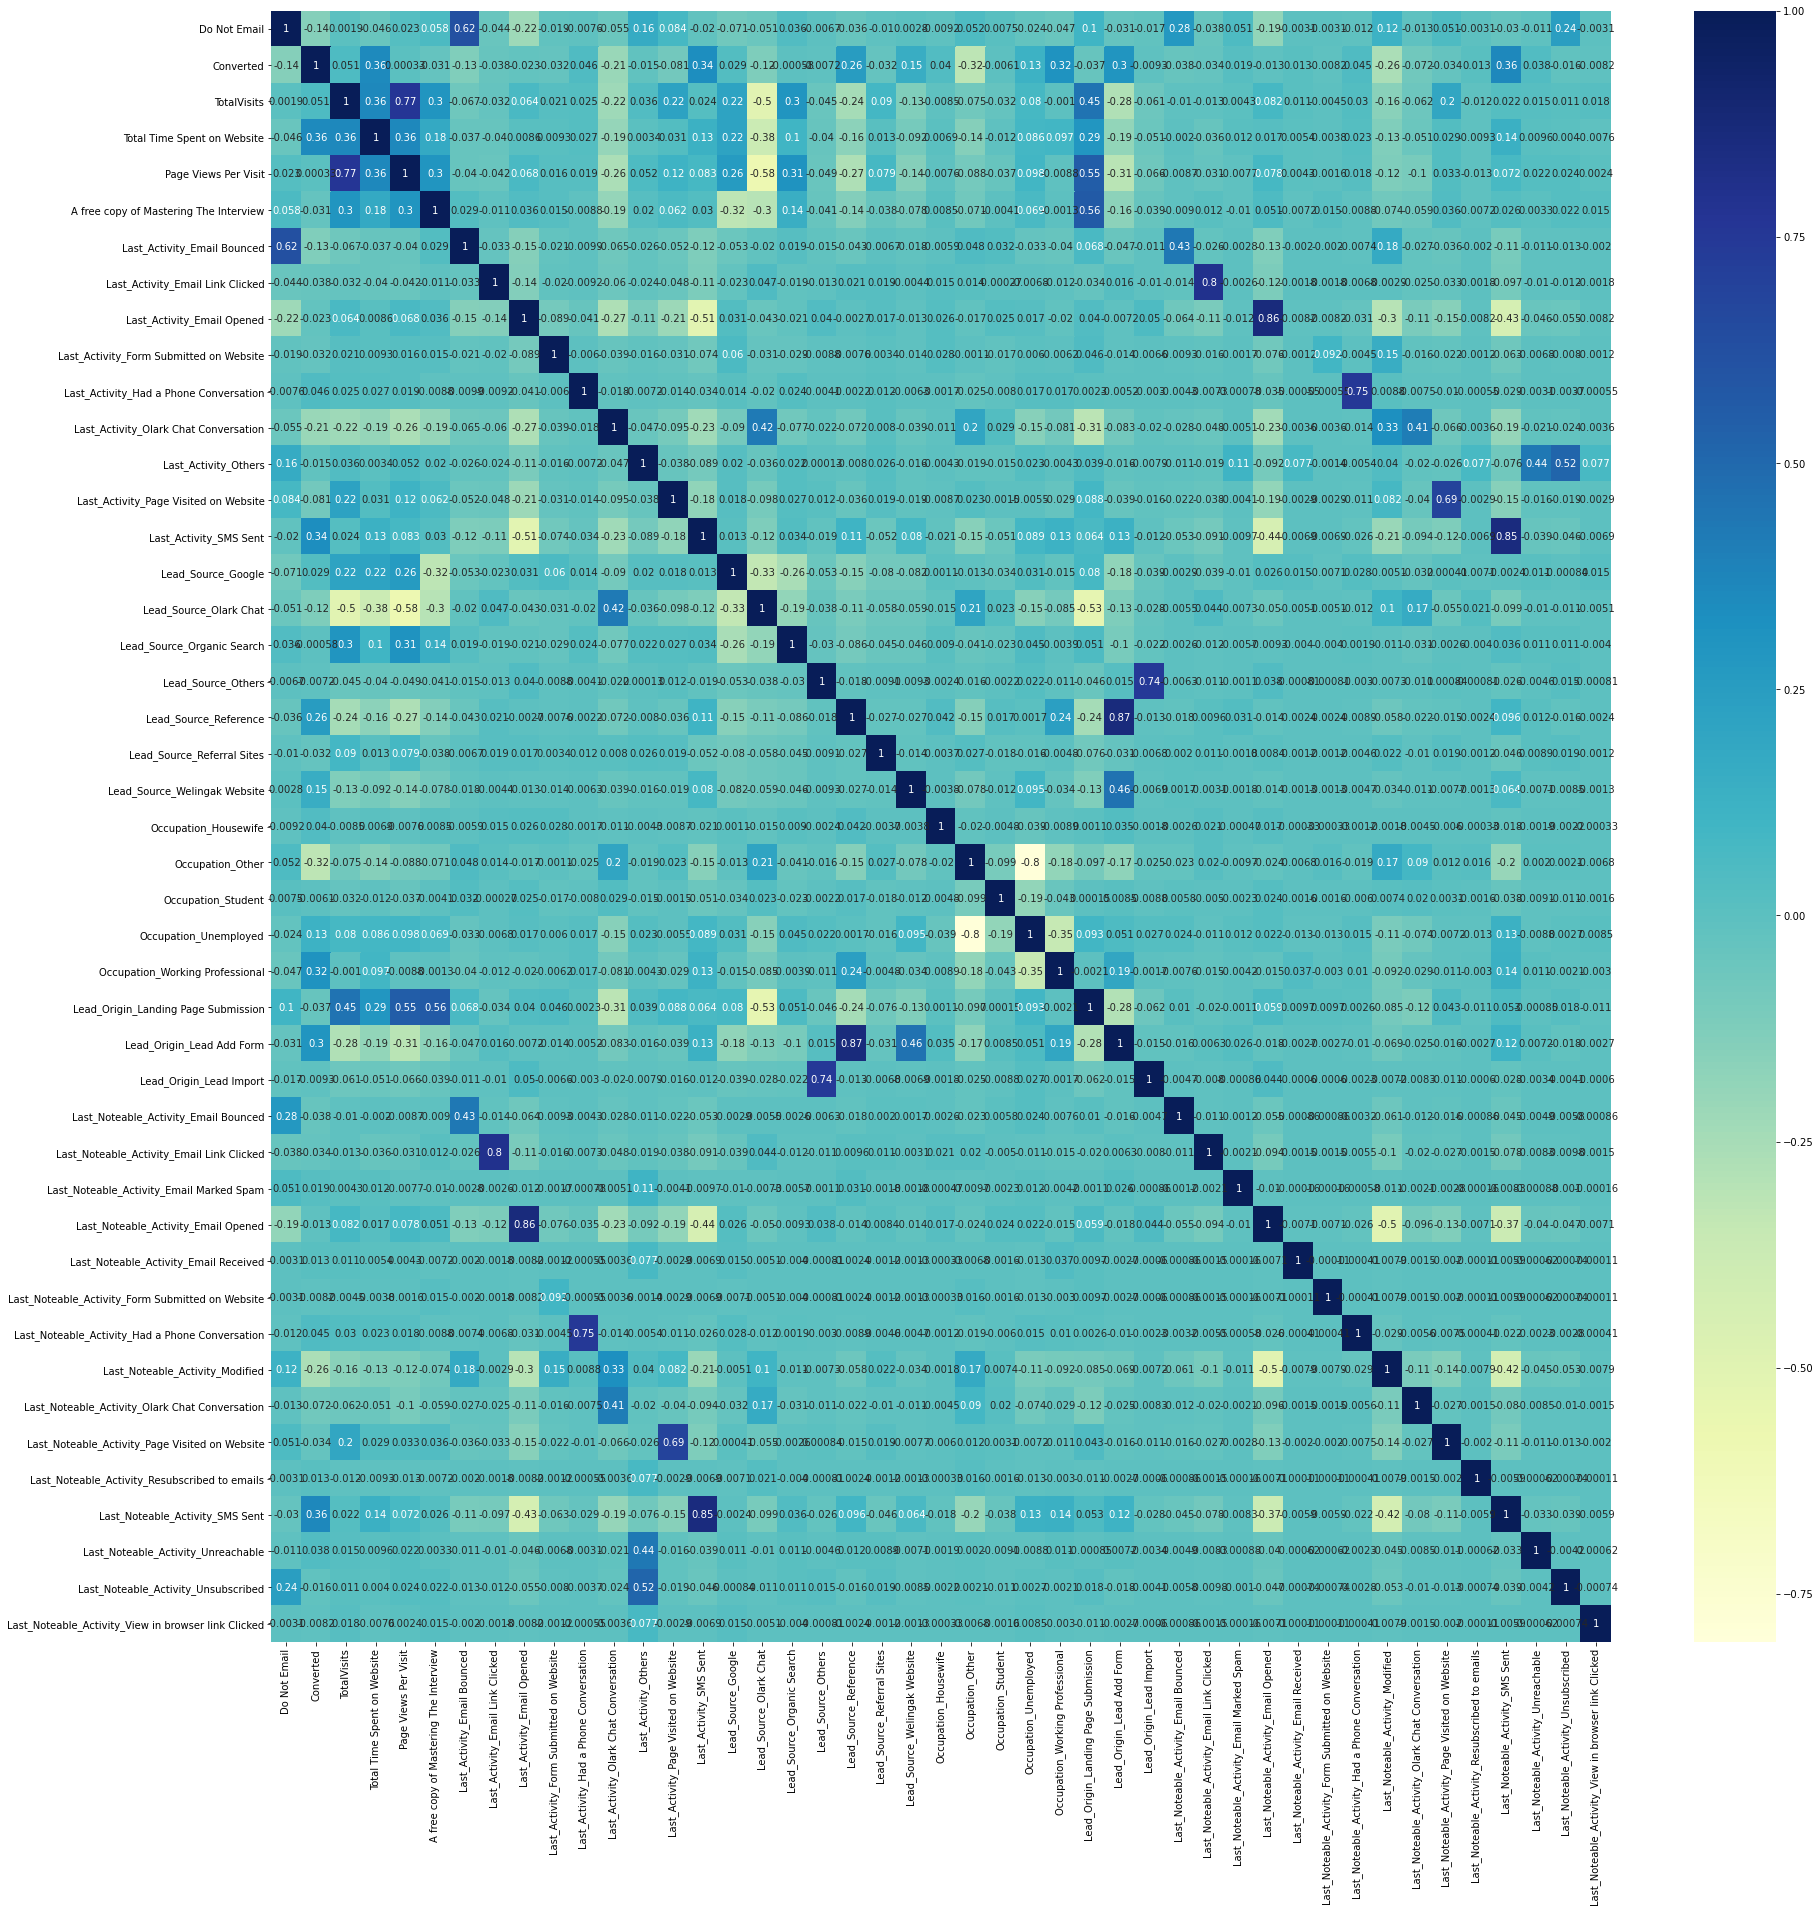

In [70]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True, cmap="YlGnBu")
plt.show()

- Strong Correlation present between Lead_Origin_Lead Add Form and Lead_Source_Reference, Last_Noteable_Activity_Email Opened and Last_Activity_Email Opened

In [71]:
##to find top 10 correlations
corr_matrix_leads_data = leads_data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

corr_leads = (corr_matrix_leads_data.where(np.triu(np.ones(corr_matrix_leads_data.shape), k=1).astype(np.bool))
                  .unstack()
                  .sort_values(ascending=False))
corr_leads.head(10)

Lead_Origin_Lead Add Form                        Lead_Source_Reference                     0.866191
Last_Noteable_Activity_Email Opened              Last_Activity_Email Opened                0.861636
Last_Noteable_Activity_SMS Sent                  Last_Activity_SMS Sent                    0.853102
Occupation_Unemployed                            Occupation_Other                          0.802505
Last_Noteable_Activity_Email Link Clicked        Last_Activity_Email Link Clicked          0.800686
Page Views Per Visit                             TotalVisits                               0.766567
Last_Noteable_Activity_Had a Phone Conversation  Last_Activity_Had a Phone Conversation    0.747877
Lead_Origin_Lead Import                          Lead_Source_Others                        0.744366
Last_Noteable_Activity_Page Visited on Website   Last_Activity_Page Visited on Website     0.691811
Last_Activity_Email Bounced                      Do Not Email                              0.620041


According to above correlation we will drop one of the above columns 

In [72]:
###list down columns to be dropped
### drop the columns
drop_column=['Lead_Source_Others','Last_Noteable_Activity_Had a Phone Conversation',
             'Last_Activity_Email Bounced','Last_Noteable_Activity_Email Link Clicked','Last_Noteable_Activity_SMS Sent',
            'Last_Noteable_Activity_Page Visited on Website','Last_Noteable_Activity_Unreachable']

X_train.drop(drop_column, axis=1, inplace=True)
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Last_Noteable_Activity_Email Bounced,Last_Noteable_Activity_Email Marked Spam,Last_Noteable_Activity_Email Opened,Last_Noteable_Activity_Email Received,Last_Noteable_Activity_Form Submitted on Website,Last_Noteable_Activity_Modified,Last_Noteable_Activity_Olark Chat Conversation,Last_Noteable_Activity_Resubscribed to emails,Last_Noteable_Activity_Unsubscribed,Last_Noteable_Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7987,0,0.643547,2.017593,0.122613,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [73]:
##drop above column from test dataframe also
X_test.drop(drop_column, axis=1, inplace=True)
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Last_Noteable_Activity_Email Bounced,Last_Noteable_Activity_Email Marked Spam,Last_Noteable_Activity_Email Opened,Last_Noteable_Activity_Email Received,Last_Noteable_Activity_Form Submitted on Website,Last_Noteable_Activity_Modified,Last_Noteable_Activity_Olark Chat Conversation,Last_Noteable_Activity_Resubscribed to emails,Last_Noteable_Activity_Unsubscribed,Last_Noteable_Activity_View in browser link Clicked
3271,0,4.0,157,4.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1490,0,5.0,1513,5.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
7936,0,2.0,74,2.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4216,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3830,0,8.0,164,6.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


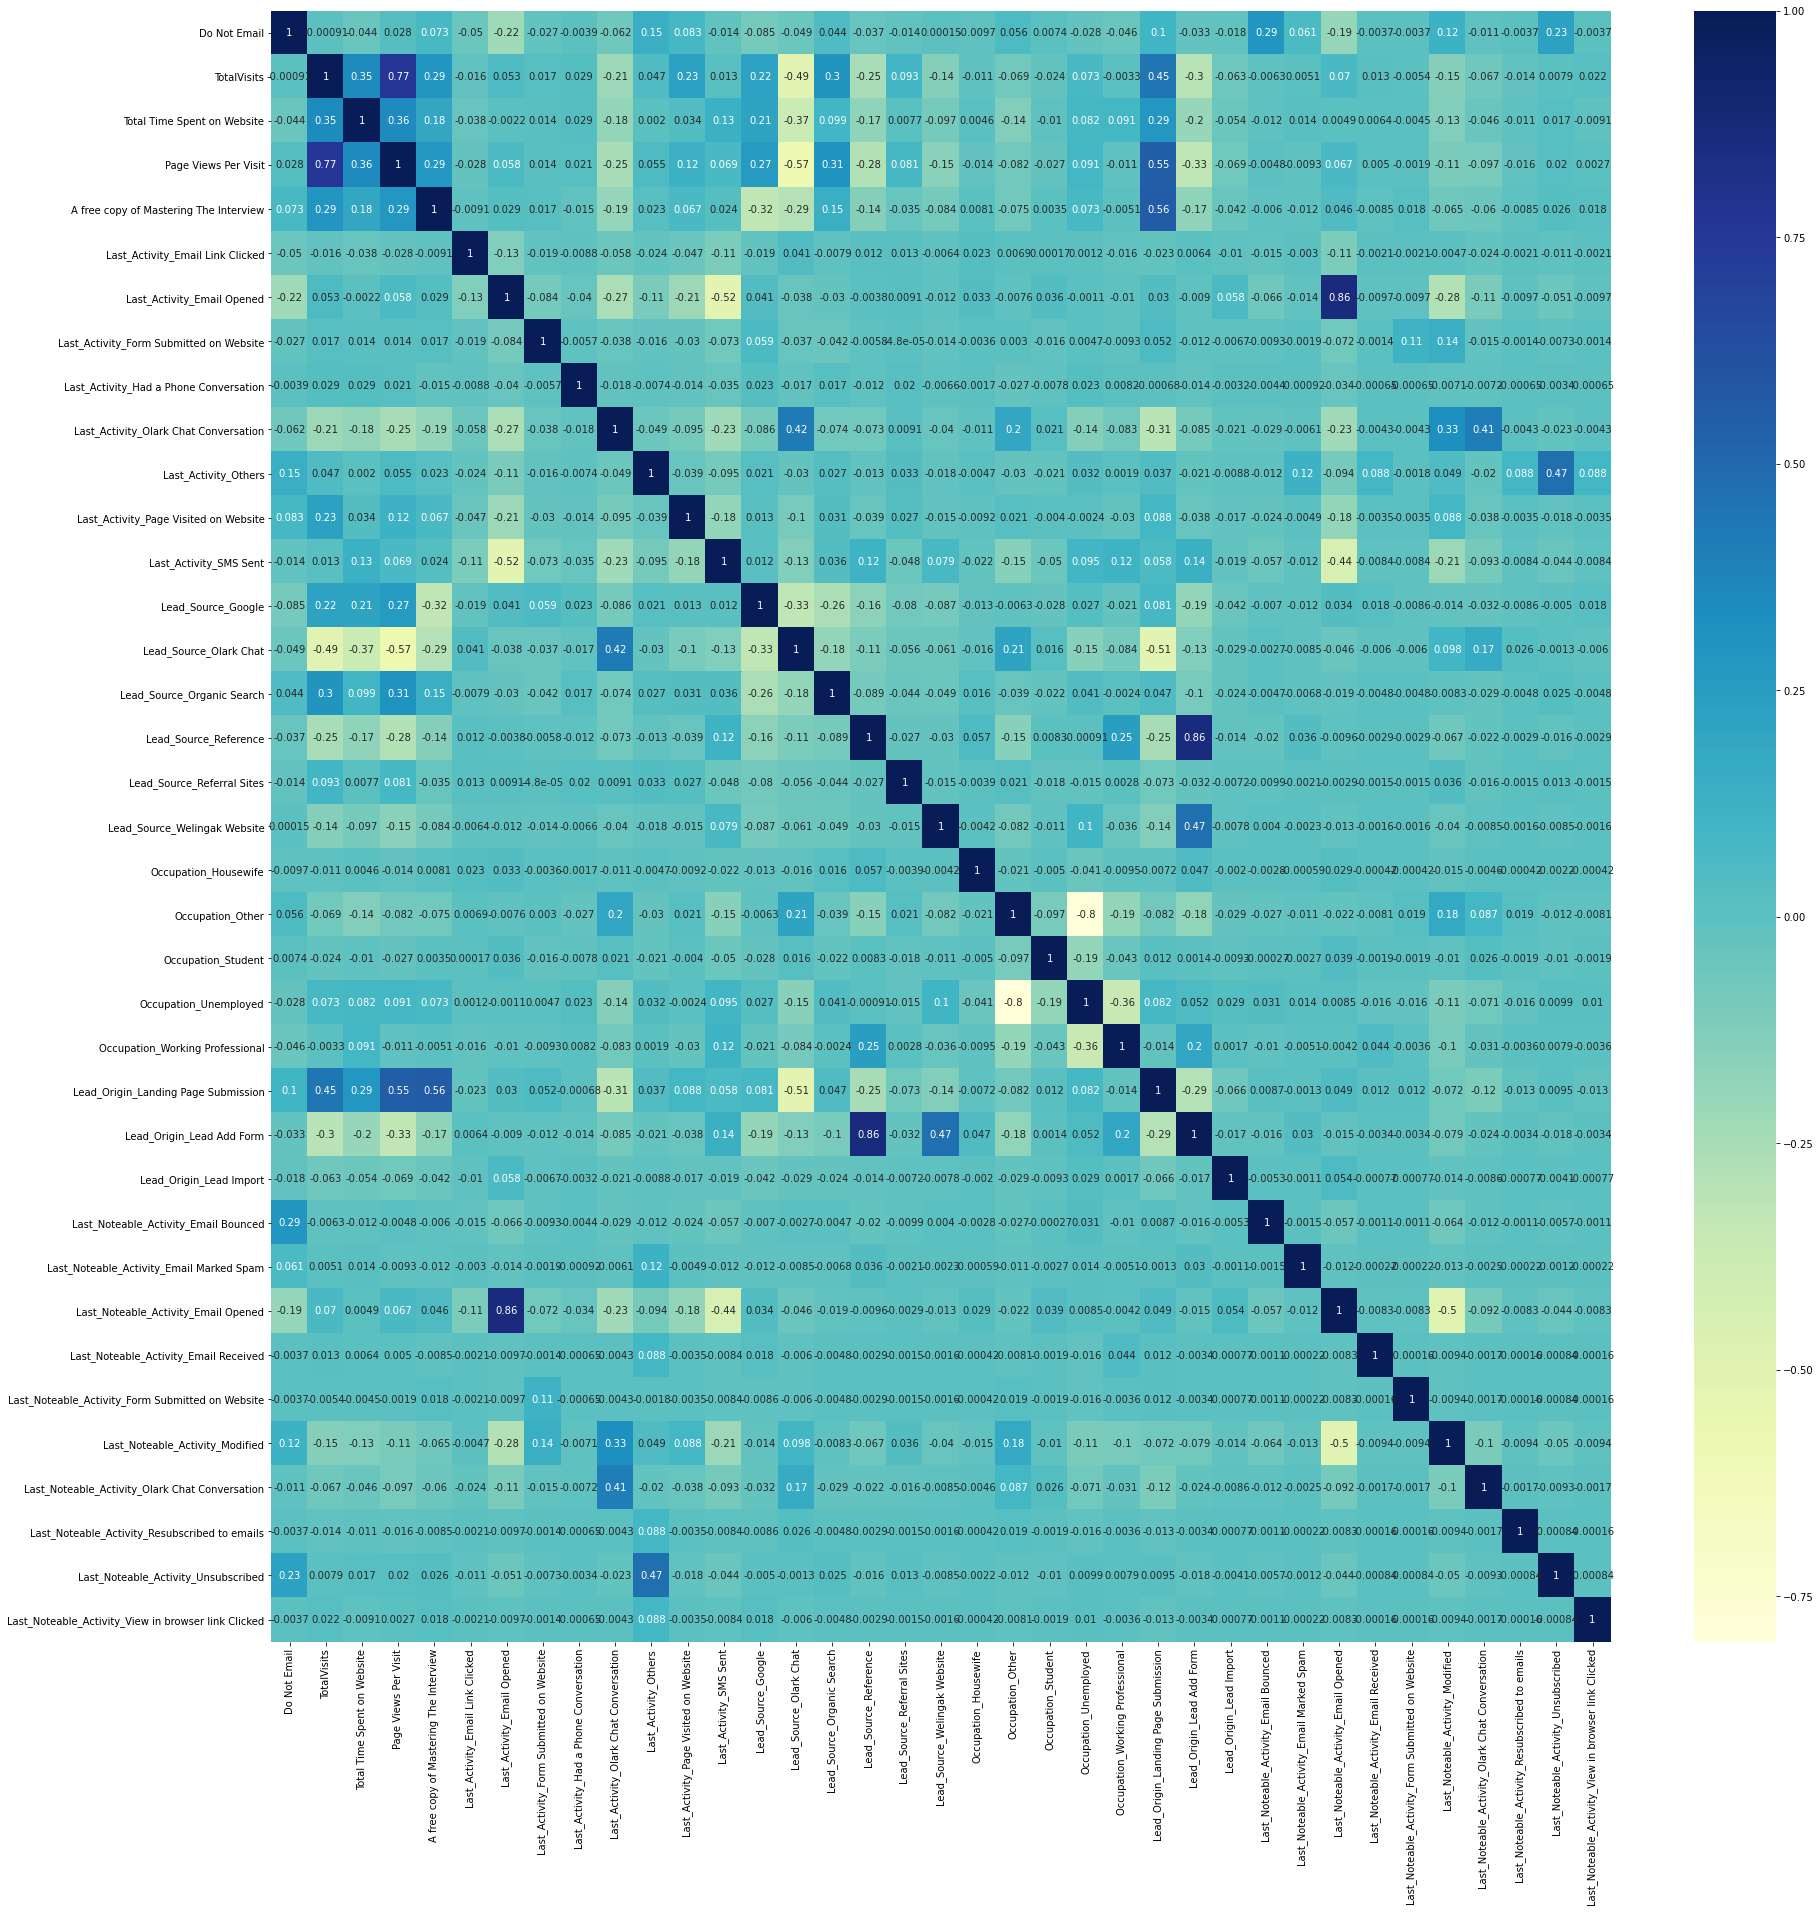

In [74]:
# again see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

#### 4.4 Model Building

#### Model 1: Running Your First Training Model

In [75]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2497.0
Date:                Tue, 13 Jul 2021   Deviance:                       4993.9
Time:                        22:56:25   Pearson chi2:                 6.17e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -0.3764      1.106     -0.340      0.734      -2.544       1.791
Do Not Email                                           -1.5825      0.215     -7.345      0.000      -2.005      -1.160
TotalVisits                                             0.3217      0.056      5.695      0.000       0.211       0.432
Total Time Spent on Website                             1.1356      0.042     27.055      0.000       1.053       1.218
Page Views Per Visit                                   -0.2734      0.064     -4.304      0.000      -0.398      -0.149
A free copy of Mastering The Interview                 -0.0676      0.109     -0.620      0.535      -0.281       0.146
Last_Activity_Email Link Clicked                        0.1965      0.312      0.629      0.529      -0.416       0.809
Last_Activity_Email Opened                              1.0562      0.247      4.281      0.000       0.573       1.540
Last_Activity_Form Submitted on Website                 0.5820      0.400      1.456      0.145      -0.202       1.366
Last_Activity_Had a Phone Conversation                  3.1629      0.795      3.981      0.000       1.606       4.720
Last_Activity_Olark Chat Conversation                  -0.2512      0.278     -0.903      0.367      -0.796       0.294
Last_Activity_Others                                    1.3419      0.345      3.888      0.000       0.665       2.018
Last_Activity_Page Visited on Website                   0.2089      0.269      0.775      0.438      -0.319       0.737
Last_Activity_SMS Sent                                  1.7446      0.240      7.272      0.000       1.274       2.215
Lead_Source_Google                                      0.3025      0.115      2.626      0.009       0.077       0.528
Lead_Source_Olark Chat                                  1.3721      0.168      8.156      0.000       1.042       1.702
Lead_Source_Organic Search                              0.0085      0.133      0.064      0.949      -0.253       0.270
Lead_Source_Reference                                   1.7656      0.945      1.868      0.062      -0.087       3.618
Lead_Source_Referral Sites                             -0.1590      0.364     -0.436      0.663      -0.873       0.555
Lead_Source_Welingak Website                            3.7276      1.169      3.187      0.001       1.435       6.020
Occupation_Housewife                                   21.7259   1.56e+04      0.001      0.999   -3.06e+04    3.07e+04
Occupation_Other                                       -2.1735      1.084     -2.006      0.045      -4.298      -0.049
Occupation_Student                                     -0.8155      1.103     -0.73

#### Inferences:
- There are some columns in the above table having high p value
- We will analyze every column using RFE feature selection

In [76]:
###apply rfe to get top 15 variables
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [77]:
rfe.support_

array([ True, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False])

In [78]:
# Displaying the column information with their rank of fit based on RFE
rfe_details = pd.DataFrame({'Column':X_train.columns,'RFE_Supported':rfe.support_,'RFE_Rank':rfe.ranking_})
rfe_details.sort_values('RFE_Rank')

,Column,RFE_Supported,RFE_Rank
0,Do Not Email,True,1
33,Last_Noteable_Activity_Olark Chat Conversation,True,1
32,Last_Noteable_Activity_Modified,True,1
26,Lead_Origin_Lead Import,True,1
25,Lead_Origin_Lead Add Form,True,1
23,Occupation_Working Professional,True,1
20,Occupation_Other,True,1
19,Occupation_Housewife,True,1
16,Lead_Source_Reference,True,1
14,Lead_Source_Olark Chat,True,1


In [79]:
##take the columns in list
col = X_train.columns[rfe.support_]

In [80]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Lead_Source_Referral Sites',
       'Occupation_Student', 'Occupation_Unemployed',
       'Lead_Origin_Landing Page Submission',
       'Last_Noteable_Activity_Email Bounced',
       'Last_Noteable_Activity_Email Marked Spam',
       'Last_Noteable_Activity_Email Opened',
       'Last_Noteable_Activity_Email Received',
       'Last_Noteable_Activity_Form Submitted on Website',
       'Last_Noteable_Activity_Resubscribed to emails',
       'Last_Noteable_Activity_Unsubscribed',
       'Last_Noteable_Activity_View in browser link Clicked'],
      dtype='object')

#### Model2: Build the second model with updated columns

In [81]:
##build logistic regression model 
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.1
Date:                Tue, 13 Jul 2021   Deviance:                       5108.2
Time:                        22:56:28   Pearson chi2:                 6.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.9464      0.061    -15.586      0.000      -1.065      -0.827
Do Not Email                                      -1.6510      0.181     -9.104      0.000      -2.006      -1.296
Total Time Spent on Website                        1.1515      0.042     27.699      0.000       1.070       1.233
Last_Activity_Had a Phone Conversation             2.8811      0.760      3.791      0.000       1.392       4.371
Last_Activity_Others                               1.1027      0.241      4.581      0.000       0.631       1.574
Last_Activity_SMS Sent                             1.2914      0.076     16.939      0.000       1.142       1.441
Lead_Source_Olark Chat                             1.3433      0.105     12.782      0.000       1.137       1.549
Lead_Source_Reference                              1.7897      0.988      1.812      0.070      -0.146       3.725
Lead_Source_Welingak Website                       3.7187      1.204      3.089      0.002       1.359       6.078
Occupation_Housewife                              22.5852   1.58e+04      0.001      0.999    -3.1e+04    3.11e+04
Occupation_Other                                  -1.1828      0.088    -13.395      0.000      -1.356      -1.010
Occupation_Working Professional                    2.4816      0.189     13.134      0.000       2.111       2.852
Lead_Origin_Lead Add Form                          1.9801      0.964      2.054      0.040       0.091       3.869
Lead_Origin_Lead Import                            1.3410      0.461      2.907      0.004       0.437       2.245
Last_Noteable_Activity_Modified                   -0.9736      0.080    -12.216      0.000      -1.130      -0.817
Last_Noteable_Activity_Olark Chat Conversation    -1.2161      0.329     -3.691      0.000      -1.862      -0.570
==================================================================================================================
"""

In [82]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.089991
1012    0.323496
9226    0.423450
4750    0.741618
7987    0.844817
1281    0.802272
2880    0.041327
4971    0.926707
7536    0.901071
1248    0.819167
dtype: float64

In [83]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08999133, 0.3234963 , 0.42344985, 0.74161812, 0.84481749,
       0.80227234, 0.04132747, 0.92670729, 0.90107077, 0.81916729])

#### checking VIF's

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead_Origin_Lead Add Form,62.35
6,Lead_Source_Reference,48.06
7,Lead_Source_Welingak Website,15.46
5,Lead_Source_Olark Chat,1.47
9,Occupation_Other,1.42
13,Last_Noteable_Activity_Modified,1.40
1,Total Time Spent on Website,1.28
4,Last_Activity_SMS Sent,1.25
10,Occupation_Working Professional,1.17
0,Do Not Email,1.13


- Drop the columns 'Lead_Origin_Lead Add Form' and 'Lead_Source_Reference'
- And build the model again

In [86]:
##drop columns
col=col.drop('Lead_Origin_Lead Add Form')
col=col.drop('Lead_Source_Reference')

In [87]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Last_Activity_Had a Phone Conversation', 'Last_Activity_Others',
       'Last_Activity_SMS Sent', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Other', 'Occupation_Working Professional',
       'Lead_Origin_Lead Import', 'Last_Noteable_Activity_Modified',
       'Last_Noteable_Activity_Olark Chat Conversation'],
      dtype='object')

#### Model3: Building third model

In [88]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2779.9
Date:                Tue, 13 Jul 2021   Deviance:                       5559.8
Time:                        22:56:29   Pearson chi2:                 5.91e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6542      0.055    -11.853      0.000      -0.762      -0.546
Do Not Email                                      -1.6121      0.170     -9.489      0.000      -1.945      -1.279
Total Time Spent on Website                        0.9115      0.037     24.401      0.000       0.838       0.985
Last_Activity_Had a Phone Conversation             2.5542      0.744      3.431      0.001       1.095       4.013
Last_Activity_Others                               0.9869      0.231      4.280      0.000       0.535       1.439
Last_Activity_SMS Sent                             1.3228      0.072     18.301      0.000       1.181       1.464
Lead_Source_Olark Chat                             0.8800      0.099      8.901      0.000       0.686       1.074
Lead_Source_Welingak Website                       5.1676      0.724      7.137      0.000       3.748       6.587
Occupation_Housewife                              23.5478    1.6e+04      0.001      0.999   -3.12e+04    3.13e+04
Occupation_Other                                  -1.3150      0.085    -15.451      0.000      -1.482      -1.148
Occupation_Working Professional                    2.8510      0.180     15.839      0.000       2.498       3.204
Lead_Origin_Lead Import                            0.8140      0.464      1.753      0.080      -0.096       1.724
Last_Noteable_Activity_Modified                   -0.9440      0.075    -12.520      0.000      -1.092      -0.796
Last_Noteable_Activity_Olark Chat Conversation    -1.0778      0.308     -3.495      0.000      -1.682      -0.473
==================================================================================================================
"""

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead_Source_Olark Chat,1.44
8,Occupation_Other,1.42
11,Last_Noteable_Activity_Modified,1.39
1,Total Time Spent on Website,1.20
4,Last_Activity_SMS Sent,1.19
0,Do Not Email,1.12
9,Occupation_Working Professional,1.08
12,Last_Noteable_Activity_Olark Chat Conversation,1.07
3,Last_Activity_Others,1.04
6,Lead_Source_Welingak Website,1.04


In [90]:
#Occupation Housewife and Last_Activity_Had a Phone Conversation have high p value so dropping the same 
col=col.drop('Occupation_Housewife')
col=col.drop('Last_Activity_Had a Phone Conversation')

In [91]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Last_Activity_Others',
       'Last_Activity_SMS Sent', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Occupation_Other',
       'Occupation_Working Professional', 'Lead_Origin_Lead Import',
       'Last_Noteable_Activity_Modified',
       'Last_Noteable_Activity_Olark Chat Conversation'],
      dtype='object')

#### Model 4: Building model 4

In [92]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2796.1
Date:                Tue, 13 Jul 2021   Deviance:                       5592.3
Time:                        22:56:29   Pearson chi2:                 5.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6276      0.055    -11.459      0.000      -0.735      -0.520
Do Not Email                                      -1.6135      0.170     -9.507      0.000      -1.946      -1.281
Total Time Spent on Website                        0.9069      0.037     24.390      0.000       0.834       0.980
Last_Activity_Others                               0.9657      0.230      4.192      0.000       0.514       1.417
Last_Activity_SMS Sent                             1.3017      0.072     18.067      0.000       1.161       1.443
Lead_Source_Olark Chat                             0.8602      0.099      8.733      0.000       0.667       1.053
Lead_Source_Welingak Website                       5.1462      0.724      7.108      0.000       3.727       6.565
Occupation_Other                                  -1.3246      0.085    -15.597      0.000      -1.491      -1.158
Occupation_Working Professional                    2.8339      0.180     15.768      0.000       2.482       3.186
Lead_Origin_Lead Import                            0.7889      0.464      1.700      0.089      -0.121       1.698
Last_Noteable_Activity_Modified                   -0.9446      0.075    -12.575      0.000      -1.092      -0.797
Last_Noteable_Activity_Olark Chat Conversation    -1.0886      0.308     -3.532      0.000      -1.693      -0.484
==================================================================================================================
"""

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead_Source_Olark Chat,1.44
6,Occupation_Other,1.42
9,Last_Noteable_Activity_Modified,1.39
1,Total Time Spent on Website,1.20
3,Last_Activity_SMS Sent,1.19
0,Do Not Email,1.12
7,Occupation_Working Professional,1.08
10,Last_Noteable_Activity_Olark Chat Conversation,1.07
2,Last_Activity_Others,1.04
5,Lead_Source_Welingak Website,1.04


'Lead_Origin_Lead Import' column has p value >0.05. So we will drop this column and analyse the model again

In [94]:
##drop column
col = col.drop('Lead_Origin_Lead Import')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Last_Activity_Others',
       'Last_Activity_SMS Sent', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Occupation_Other',
       'Occupation_Working Professional', 'Last_Noteable_Activity_Modified',
       'Last_Noteable_Activity_Olark Chat Conversation'],
      dtype='object')

In [95]:
col.shape

(10,)

#### Model 5 : Final Model

In [96]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2797.5
Date:                Tue, 13 Jul 2021   Deviance:                       5594.9
Time:                        22:56:29   Pearson chi2:                 5.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6201      0.055    -11.368      0.000      -0.727      -0.513
Do Not Email                                      -1.6160      0.170     -9.528      0.000      -1.948      -1.284
Total Time Spent on Website                        0.9019      0.037     24.362      0.000       0.829       0.974
Last_Activity_Others                               0.9606      0.230      4.172      0.000       0.509       1.412
Last_Activity_SMS Sent                             1.2985      0.072     18.033      0.000       1.157       1.440
Lead_Source_Olark Chat                             0.8505      0.098      8.656      0.000       0.658       1.043
Lead_Source_Welingak Website                       5.1362      0.724      7.095      0.000       3.717       6.555
Occupation_Other                                  -1.3265      0.085    -15.631      0.000      -1.493      -1.160
Occupation_Working Professional                    2.8326      0.180     15.768      0.000       2.480       3.185
Last_Noteable_Activity_Modified                   -0.9449      0.075    -12.583      0.000      -1.092      -0.798
Last_Noteable_Activity_Olark Chat Conversation    -1.0889      0.308     -3.536      0.000      -1.693      -0.485
==================================================================================================================
"""

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead_Source_Olark Chat,1.44
6,Occupation_Other,1.42
8,Last_Noteable_Activity_Modified,1.39
1,Total Time Spent on Website,1.19
3,Last_Activity_SMS Sent,1.19
0,Do Not Email,1.12
7,Occupation_Working Professional,1.08
9,Last_Noteable_Activity_Olark Chat Conversation,1.07
2,Last_Activity_Others,1.04
5,Lead_Source_Welingak Website,1.04


We can processed with the above model.
- P values of all the columns are less than 0.05
- VIF is less than 5%

In [98]:
##reshape the column
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [99]:
###Takke top 10 values
y_train_pred[:10]

array([0.10996301, 0.52732615, 0.44586736, 0.69719116, 0.82537518,
       0.81834956, 0.06057229, 0.91648028, 0.86430988, 0.80364533])

In [100]:
##Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['ConvertID'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,ConvertID
0,0,0.109963,3009
1,0,0.527326,1012
2,0,0.445867,9226
3,1,0.697191,4750
4,1,0.825375,7987


In [101]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [102]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,ConvertID,predicted
0,0,0.109963,3009,0
1,0,0.527326,1012,1
2,0,0.445867,9226,0
3,1,0.697191,4750,1
4,1,0.825375,7987,1


In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7833412061092742


In [104]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3367,  538],
       [ 838, 1608]], dtype=int64)

In [105]:
# Actual/Predicted     not_Converted    Converted
        # not_Converted        3367      538
        # Converted            838       1608  

In [106]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7833412061092742

#### 4.5 Metrics beyond simply accuracy

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6573998364677024

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8622279129321383

In [110]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1377720870678617


In [111]:
# positive predictive value 
print (TP / float(TP+FP))

0.7493010251630942


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8007134363852556


### 4.6 Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

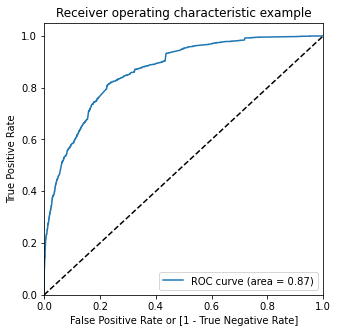

In [115]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

#### 4.7  Finding Optimal Cutoff Point

In [116]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,ConvertID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.109963,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.527326,1012,1,1,1,1,1,1,1,0,0,0,0
2,0,0.445867,9226,0,1,1,1,1,1,0,0,0,0,0
3,1,0.697191,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.825375,7987,1,1,1,1,1,1,1,1,1,1,0


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.589041  0.978332  0.345198
0.2   0.2  0.701149  0.899428  0.576953
0.3   0.3  0.769170  0.836468  0.727017
0.4   0.4  0.790742  0.744890  0.819462
0.5   0.5  0.783341  0.657400  0.862228
0.6   0.6  0.778303  0.562960  0.913188
0.7   0.7  0.758148  0.446034  0.953649
0.8   0.8  0.738151  0.365086  0.971831
0.9   0.9  0.699732  0.235078  0.990781


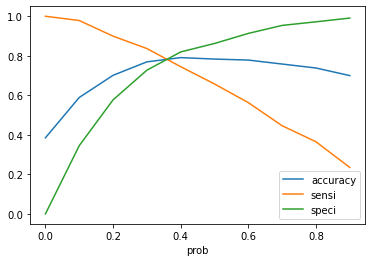

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- We have a good accuracy by manually taking threshold frequency as 0.5 but this our model can miss several customers which are actually converting into hot leads by misidentifying them as non-hot leads. 
- So from the above curve, 0.38-0.39 is the optimum point to take it as a cutoff probability

#### Creating new column 'Final_Predicted' with 1 if Conversion_Probability > 0.38 else 0

In [119]:
###create new column 'Final_Predicted' 
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,ConvertID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.109963,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.527326,1012,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.445867,9226,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.697191,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.825375,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7888521492678319

In [121]:
###create confusion metrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2 = pd.DataFrame(confusion)
confusion2.index = ['Not Converted','Converted']
confusion2.columns = ['Not Converted','Converted']
confusion2

,Not Converted,Converted
Not Converted,3367,538
Converted,838,1608


#### Metrics beyond simply accuracy

In [122]:
TP = confusion2.iloc[1,1] # true positive 
TN = confusion2.iloc[0,0] # true negatives
FP = confusion2.iloc[0,1] # false positives
FN = confusion2.iloc[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6573998364677024

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.8622279129321383

In [125]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1377720870678617


In [126]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7493010251630942


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8007134363852556


#### 4,8 Precision and Recall

In [128]:
## look at confusion metrics again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3367,  538],
       [ 838, 1608]], dtype=int64)

#### Precision
TP / TP + FP

In [129]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7493010251630942

#### Recall
TP / TP + FN

In [130]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6573998364677024

## Conclusion

It can be observed that the overall model performance is good and even the ROC curve has a value of 0.87 which further reassures
this analysis

- The Accuracy of the model is ~79%
- Recall is ~66%
- Precision is ~75%
- Sesitivity is 65%
- Specificity is 86%

#### Precision and recall tradeoff

In [131]:
from sklearn.metrics import precision_recall_curve

In [132]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

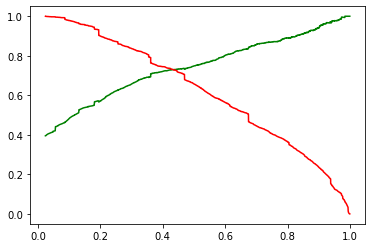

In [134]:
###plot graph Precision and recall tradeoff
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 5 - Making predictions on the test set

In [135]:
### Apply scaler transform on test dataframe
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [136]:
###get final dataframe on X_test
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Last_Activity_Others,Last_Activity_SMS Sent,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Occupation_Other,Occupation_Working Professional,Last_Noteable_Activity_Modified,Last_Noteable_Activity_Olark Chat Conversation
3271,0,-0.600595,0,0,0,0,1,0,0,0
1490,0,1.887326,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,0,0,0,0,0,1,0
3830,0,-0.587751,0,0,0,0,1,0,0,0


In [137]:
X_test_sm = sm.add_constant(X_test)

In [138]:
y_test_pred = res.predict(X_test_sm)

In [139]:
y_test_pred[:10]

3271    0.076685
1490    0.980443
7936    0.067509
4216    0.085773
3830    0.077510
1800    0.822998
6507    0.522584
4821    0.427272
4223    0.469273
4714    0.175968
dtype: float64

In [140]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
# Let's see the head
y_pred_1.head()

,0
3271,0.076685
1490,0.980443
7936,0.067509
4216,0.085773
3830,0.077510


In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [143]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [144]:
y_pred_final.head()

,Converted,0
3271,0,0.076685
1490,1,0.980443
7936,0,0.067509
4216,1,0.085773
3830,0,0.077510


In [145]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [146]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Convert_Prob
3271,0,0.076685
1490,1,0.980443
7936,0,0.067509
4216,1,0.085773
3830,0,0.077510


In [147]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,Converted,Convert_Prob,final_predicted
3271,0,0.076685,0
1490,1,0.980443,1
7936,0,0.067509,0
4216,1,0.085773,0
3830,0,0.077510,0


In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7851634226955564

In [149]:
##create confusion metrics
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1406,  328],
       [ 257,  732]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7401415571284126

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

0.8108419838523645

### Conclusion

Post analysis if was observed that cutoff point came out to be 0.38 which essentially will take the specificity & sensitivity
and thereby increasing the model efficiency and performance

Post taking this cutoff point below are the new metrics values-

1. Model Accuracy is 78.5%
2. Sesitivity is 74%
3. Sepcificity is 81% 

We can observe here that accuracy is almost the same but sensitvity has increased to 74% from 65% which is great whearas specificity lies almost in the same range.